In [185]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import mrmr
from pymrmr import mRMR
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import mrmr
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import os.path
import json
from sklearn.metrics import auc, precision_recall_curve, average_precision_score, PrecisionRecallDisplay
import pymrmr
from scipy.stats import kruskal, mannwhitneyu, kendalltau, spearmanr
from boruta import BorutaPy
import umap.umap_ as umap
import icikt
from tqdm import tqdm
from sklearn.feature_selection import mutual_info_classif as MIC
from minepy import MINE
from collections import defaultdict

# Import data

In [27]:
# import data from csv 
cnv = pd.read_csv('dataset_hg19/dataset/cnv.csv', sep=' ')

cnv.head()

,ACAP3,ACTRT2,AGRN,ANKRD65,ATAD3A,ATAD3B,ATAD3C,AURKAIP1,B3GALT6,C1orf159,...,SMIM9,SNORA36A,SNORA56,TMLHE,VBP1,IL9R|ENSG00000124334.12,SPRY3|ENSG00000168939.6,VAMP7|ENSG00000124333.10,WASH6P|ENSG00000182484.10,WASIR1|ENSG00000185203.7
TCGA-3C-AALI,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
TCGA-3C-AALK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-4H-AAAK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-5L-AAT1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-5T-A9QA,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0


In [28]:
miRNA = pd.read_csv('dataset_hg19/dataset/mirna.csv', sep=' ')

miRNA.head()

,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-941-3,hsa-mir-941-4,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
TCGA-3C-AALI,49201,98691,49035,148591,5095,3263,3566,133,41683,2231,...,0,0,52,0,4,8,383,547,1503,80378
TCGA-3C-AALK,57278,114320,57540,164553,18464,2114,8364,113,40723,2245,...,0,0,22,0,22,11,459,263,6620,152218
TCGA-4H-AAAK,67196,134563,67607,136918,20429,2162,10556,139,50848,2056,...,0,0,13,0,7,5,123,212,6666,158568
TCGA-5L-AAT1,94243,188921,94346,211457,21076,2657,12104,272,94610,3903,...,0,0,23,0,12,11,235,529,5352,196557
TCGA-5T-A9QA,49313,97721,49623,127544,2134,1769,8190,104,28306,2792,...,0,0,72,0,3,23,186,146,445,127728


In [29]:
mRNA = pd.read_csv('dataset_hg19/dataset/mrna.csv', sep=' ')

mRNA.head()

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
TCGA-3C-AALI,436.55,0,0,130.32,8,13924.87,290,1,0,1633,...,110,825,2470,365,1110,10123,2425,748,1704,0
TCGA-3C-AALK,461.69,0,0,151.08,4,26490.85,1224,0,0,1878,...,133,1058,2088,424,1468,13756,1888,1694,161,0
TCGA-4H-AAAK,631.87,1,9,362.77,8,22525.79,804,1,1,1925,...,115,997,2467,33,1823,9498,1955,2072,440,0
TCGA-5L-AAT1,259.26,0,0,125.12,5,18903.93,323,1,0,971,...,55,697,1213,66,630,5421,1732,698,71,0
TCGA-5T-A9QA,600.72,1,1,446.68,0,6084.91,787,7,0,1670,...,55,547,1548,4,615,6160,2132,843,7,0


In [30]:
proteins = pd.read_csv('dataset_hg19/dataset/proteins.csv', sep=' ')

proteins.head()

,14-3-3_beta,14-3-3_epsilon,14-3-3_zeta,4E-BP1,4E-BP1_pS65,4E-BP1_pT37_T46,4E-BP1_pT70,53BP1,A-Raf,A-Raf_pS299,...,p27_pT157,p27_pT198,p38_MAPK,p38_pT180_Y182,p53,p62-LCK-ligand,p70S6K,p70S6K_pT389,p90RSK,p90RSK_pT359_S363
TCGA-3C-AALI,-0.000752,0.022553,0.021112,0.101796,-0.382850,-0.108997,0.103860,-0.335720,0.139450,0.148123,...,-0.076626,-0.231296,-0.169884,0.040360,-0.043975,1.293687,0.783984,0.162565,-0.667649,-0.102581
TCGA-3C-AALK,-0.202252,0.077041,0.153997,0.299107,-0.438903,-0.460678,-0.358195,0.474016,0.376476,-0.160318,...,-0.219547,-0.340080,0.208381,0.365363,-0.136875,0.680809,0.612644,-0.131174,0.419210,-0.118623
TCGA-4H-AAAK,-0.208434,0.062566,0.034209,0.429696,-0.102852,-0.499466,-0.433138,0.143794,0.339525,-0.221161,...,-0.070647,-0.471717,-0.052702,0.068514,-0.080364,0.300677,0.819253,-0.520017,0.003252,-0.855659
TCGA-5L-AAT1,-0.465476,0.141845,0.232721,0.427772,-0.231596,0.276124,-0.411702,0.736283,0.398665,-0.063979,...,-0.145362,-0.582255,0.346637,0.289421,-0.225658,0.591818,0.623455,-0.559783,0.510494,-0.601296
TCGA-5T-A9QA,-0.354823,0.156575,0.249023,1.197526,0.447913,1.001215,0.307314,0.581762,0.316779,-0.085146,...,0.076588,-0.325001,0.166015,-1.064492,0.181296,-0.226434,0.842169,0.280629,0.524148,-0.500144


# Import label

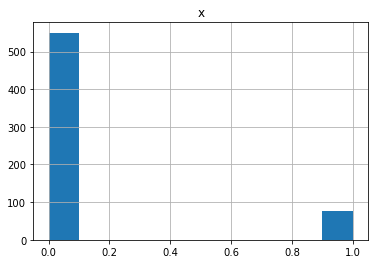

In [31]:
label = pd.read_csv('dataset_hg19/dataset/labels_pfi.csv', sep=' ')

label.hist()
plt.show()

# Check NaN values

In [32]:
def checkNaNValues(dataset):
    if dataset.isna().sum().sum() == 0:
        print(f"Non sono presenti dati NaN")
    else:
        for column in dataset:
            if dataset[column].isna().sum() == 0:
                print(f"Nella colonna {column} non sono presenti dati NaN")
            else:
                print(f"Nella colonna {column} sono presenti: {dataset[column].isna().sum()}")

In [33]:
checkNaNValues(cnv)

Non sono presenti dati NaN


In [34]:
checkNaNValues(mRNA)

Non sono presenti dati NaN


In [35]:
checkNaNValues(miRNA)

Non sono presenti dati NaN


In [36]:
checkNaNValues(proteins)

Non sono presenti dati NaN


# Normalize data

In [146]:
def dataNormalization(scaler, data):
    scl = scaler()
    model = scl.fit(data)
    scaled_data = model.transform(data)
    
    return pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

# Filter feature with low variability

In [147]:
def filter_features_with_low_variability(data, alfa) -> pd.DataFrame:
    #Delete columns with standard deviation < alfa (0.10?)
    for column in data:
        if data[column].std() < alfa:
            #print(f'column: {column} has standard deviation < {alfa}, removed')
            data.drop(column, axis=1, inplace=True)
            
    return data

# Normalize and filter datasets

In [148]:
dataset_dict = {'cnv': cnv, 'miRNA': miRNA, 'mRNA': mRNA, 'proteins': proteins}

In [149]:
def create_data_normalized_filtered(data_dict, scaler, min_variance):
    dict_filtered_nornalize = {}
    for (key, value) in zip(data_dict, data_dict.values()):
        if key != 'cnv':
            dict_filtered_nornalize[key] = filter_features_with_low_variability(dataNormalization(MinMaxScaler, value), 0.05)
        else:
            dict_filtered_nornalize[key] = value
    return dict_filtered_nornalize

# Store and retrieve data normalize and filtered

In [150]:
def mkdir_p(path):
    try:
        os.makedirs(path)
    except OSError as exc: # Python >2.5
        if exc.errno == errno.EEXIST and os.path.isdir(path):
            pass
        else: raise

In [151]:
def store_filtered_normalize_data(dataset_dict):
    if not os.path.exists('filtered_normalize_data'):
        mkdir_p('filtered_normalize_data')
        filtered_normalize_data = create_data_normalized_filtered(dataset_dict, MinMaxScaler, 0.05)
        for data in dataset_dict:
            filtered_normalize_data[data].to_json('filtered_normalize_data/'+data+'.json')

In [152]:
def load_filtered_normalize_data(dataset_dict):
    dict_test = {}
    if os.path.exists('filtered_normalize_data'):
        for data in dataset_dict:
            with open('filtered_normalize_data/'+data+'.json', 'r') as fp:
                dataset = pd.read_json(fp)
                dict_test[data] = dataset
        return dict_test
    else:
        store_filtered_normalize_data(dataset_dict)
        load_filtered_normalize_data(dataset_dict)

In [83]:
%time datasets = load_filtered_normalize_data(dataset_dict)

CPU times: user 18.7 s, sys: 786 ms, total: 19.5 s
Wall time: 19.4 s


In [45]:
#baseline AUPRC
label[label['x'] == 1].count()/len(label)

x    0.122807
dtype: float64

# Correlation with Spearman on cnv

In [46]:
p_value_threshold = 0.05
correlation_threshold = 0.01

In [153]:
def compute_spearmanr_with_label(dataset):
    not_correlated_features = []
    for feature in tqdm(dataset.columns, desc=f"Running Pearson test on cnv", dynamic_ncols=True, leave=False):
        correlation, p_value = spearmanr(dataset[feature].values.flatten(), label.values.flatten())
        if p_value > p_value_threshold:
            #print(f"In cnv the feature {feature} does not correlate in a statistically significant manner with the output. p-value:{p_value} -- correlation:{correlation}")
            not_correlated_features.append(feature)
    return not_correlated_features

In [154]:
def spearmanr_between_feature(
    X:pd.DataFrame,
    feature_left: str,
    feature_right: str,
):
    """Returns Spearman correlation.
    
    Implementative details
    ------------------------------
    We may need to recompute this value across
    multiple re-runs of the jupyter notebook,
    so since it takes a bit of time to do so we cache it.
    
    Parameters
    ----------------------
    X:pd.DataFrame,
        The epigenomic data.
    feature_left: str,
        The left features to compute pearson for.
    feature_right: str,
        The right features to compute pearson for.
    """
    correlation, p_value = spearmanr(
        X[feature_left].values.flatten(),
        X[feature_right].values.flatten(),
    )
    return dict(
        correlation=correlation,
        p_value=p_value
    )

In [155]:
def compute_spearmanr_between_feature(dataset):
    spearman_result = []
    score = []
    highly_correlated_future = []
    for feature_left in tqdm(dataset.columns, desc=f"Running Spearman test", dynamic_ncols=True, leave=False):
        for feature_right in dataset.columns:
                spearman_result  = spearmanr_between_feature(dataset,feature_left,feature_right)
                
                score.append(spearman_result)
                if feature_left!=feature_right and spearman_result["p_value"] < p_value_threshold and np.abs(spearman_result["correlation"]) > 0.95:
                    correlation = spearman_result["correlation"]
                    #print(f"The feature {feature_left} is highly correlated with {feature_right} ({correlation}).")
                    highly_correlated_future.append(feature_left)
    return highly_correlated_future

## Drop features not correlated with output

In [156]:
new_df = datasets['cnv'].drop(compute_spearmanr_with_label(datasets['cnv']), axis=1)

## Drop highly correleted features

In [157]:
high_correlated_feature = compute_spearmanr_between_feature(new_df)

In [158]:
new_new_df = new_df.drop(high_correlated_feature, axis=1)

In [159]:
new_new_df

,RNU6ATAC33P,KIF18A,DLG2,GIP,KDM4B,MACROD2,RNA5SP475,TM4SF2,FMR1NB
TCGA-3C-AALI,0,0,1,2,-1,1,1,1,1
TCGA-3C-AALK,0,0,-1,2,0,0,0,0,0
TCGA-4H-AAAK,0,0,0,1,-1,0,0,0,0
TCGA-5L-AAT1,0,0,0,0,0,0,0,0,0
TCGA-5T-A9QA,1,1,1,1,-1,-1,-1,0,0
...,...,...,...,...,...,...,...,...,...
TCGA-W8-A86G,0,0,0,0,1,1,1,0,0
TCGA-WT-AB41,0,0,1,0,0,0,0,0,0
TCGA-XX-A899,0,0,-1,0,0,0,0,0,0
TCGA-Z7-A8R5,-1,-1,-1,0,0,0,0,0,0


# Correlation with Mine

In [160]:
def compute_mine(dataset):
    feature_to_drop = []
    for feature in tqdm(dataset.columns, desc=f"Running MINE test for {key}", dynamic_ncols=True, leave=False):
        mine = MINE()
        mine.compute_score(dataset[feature].values.ravel(), label.values.ravel())
        score = mine.mic()
        if score < correlation_threshold:
            feature_to_drop.append(feature)
    return feature_to_drop

In [161]:
compute_mine(datasets['cnv'])

['ACAP3',
 'ACTRT2',
 'AGRN',
 'ANKRD65',
 'ATAD3A',
 'ATAD3B',
 'ATAD3C',
 'AURKAIP1',
 'B3GALT6',
 'C1orf159',
 'C1orf170',
 'C1orf222',
 'C1orf233',
 'C1orf86',
 'CALML6',
 'CCNL2',
 'CDK11A',
 'CDK11B',
 'CPSF3L',
 'DDX11L1',
 'DVL1',
 'FAM132A',
 'FAM138A',
 'FAM213B',
 'FAM41C',
 'FAM87B',
 'GABRD',
 'GLTPD1',
 'GNB1',
 'HES4',
 'HES5',
 'ISG15',
 'KLHL17',
 'LINC00115',
 'LINC00982',
 'MIB2',
 'MIR200A',
 'MIR200B',
 'MIR429',
 'MMEL1',
 'MMP23B',
 'MORN1',
 'MRPL20',
 'MXRA8',
 'NADK',
 'NOC2L',
 'OR4F16',
 'OR4F29',
 'OR4F5',
 'PANK4',
 'PEX10',
 'PLCH2',
 'PLEKHN1',
 'PRDM16',
 'PRKCZ',
 'PUSL1',
 'RER1',
 'RN7SL657P',
 'RNF223',
 'SAMD11',
 'SCNN1D',
 'SDF4',
 'SKI',
 'SLC35E2B',
 'SLC35E2',
 'SSU72',
 'TAS1R3',
 'TMEM240',
 'TMEM52',
 'TMEM88B',
 'TNFRSF14',
 'TNFRSF18',
 'TNFRSF4',
 'TTC34',
 'TTLL10',
 'UBE2J2',
 'VWA1',
 'ARHGEF16',
 'MEGF6',
 'MIR551A',
 'TPRG1L',
 'WRAP73',
 'TP73',
 'CCDC27',
 'SMIM1',
 'LRRC47',
 'RN7SL574P',
 'CEP104',
 'DFFB',
 'C1orf174',
 'AJAP1'

# Univariate feature selection using Kruskal-Wallis e Mann-Whitney

In [162]:
def create_dataframe_pos_neg(dataset, label):
    return (dataset[label['x']==1], dataset[label['x']==0])

In [163]:
def univariate_features_selection(dataset, label, univariate_tecnique, min_pValue):
    pos, neg = create_dataframe_pos_neg(dataset, label)
    H, pval = univariate_tecnique(pos, neg)
    mask = (pval < min_pValue)
    return dataset.columns[mask]

# Umap

In [164]:
def execute_umap(n_components, X, y):
    return umap.UMAP(n_neighbors=5, n_components=n_components, random_state=42).fit_transform(X, y)

# Multivariate feature selection, mrmr and Boruta

In [243]:
def execute_mrmr(dataset, n_feature):
    return mRMR(dataset, 'MIQ', n_feature)

In [225]:
def execute_boruta_feature_selection(
    X_train: pd.DataFrame,
    y_train: np.ndarray,
    holdout_number: int,
    max_iter: int = 100,
):
    """Returns tuple with list of kept features and list of discared features.
    
    Parameters
    --------------------------
    X_train: pd.DataFrame,
        The data reserved for the input of the training of the Boruta model.
    y_train: np.ndarray,
        The data reserved for the output of the training of the Boruta model.
    holdout_number: int,
        The current holdout number.
    max_iter: int = 100,
        Number of iterations to run Boruta for.
    """

    model = RandomForestClassifier(n_jobs=-1, class_weight='balanced_subsample', max_depth=5)
    
    boruta_selector = BorutaPy(
        model,
        n_estimators='auto',
        verbose=False,
        alpha=0.05,
        max_iter=max_iter, 
        random_state=42,
    )
    boruta_selector.fit(X_train.values, y_train.values.ravel())
    
    kept_features = list(X_train.columns[boruta_selector.support_])
    discarded_features = list(X_train.columns[~boruta_selector.support_])
    
    return kept_features, discarded_features

In [226]:
#kept, discarded = execute_boruta_feature_selection(filtered_normalize_data['cnv'], label, 3)

In [227]:
#filtered_normalize_data['proteins'][kept]

# Train

In [228]:
"""Because PR curves don’t use true negatives anywhere, the AUPRC won’t be “swamped” by a large proportion of true negatives in the data. You can use AUPRC on a dataset with 98% negative/2% positive examples, and it will “focus” on how the model handles the 2% positive examples. If the model handles the positive examples well, AUPRC will be high. If the model does poorly on the positive examples, AUPRC will be low. 
Ironically, AUPRC can often be most useful when its baseline is lowest, because there are many datasets with large numbers of true negatives in which the goal is to handle the small fraction of positives as best as possible."""

'Because PR curves don’t use true negatives anywhere, the AUPRC won’t be “swamped” by a large proportion of true negatives in the data. You can use AUPRC on a dataset with 98% negative/2% positive examples, and it will “focus” on how the model handles the 2% positive examples. If the model handles the positive examples well, AUPRC will be high. If the model does poorly on the positive examples, AUPRC will be low. \nIronically, AUPRC can often be most useful when its baseline is lowest, because there are many datasets with large numbers of true negatives in which the goal is to handle the small fraction of positives as best as possible.'

In [248]:
def train_model(dataset, label, num_extenal_fold, type_feature_selection):
    
    """Return AUPRC score after training.
    
    Parameters
    --------------------------
    dataset: string,
        The data reserved for the input of the training.
    label: pd.DataFrame,
        The data reserved for the output of the training.
    num_external_fold: int,
        The current holdout number.
    type_feature_selection: string,
        Type of feature selection: ['kruskal', 'mrmr', 'mannwhitneyu', 'boruta']
    min_pValue: int,
        Minimum value of p_value. Valid if type_feature_selection == 'kruskal' or 'mannwhitneyu',
    use_umap: bool,
        Specified to use or not use UMAP for feature extraction after univariate feature selection (kruskal, mannwhitneyu)
    """
    
    aucs =[]
    dataset = datasets[dataset]
    y_score_concatenated = []
    y_test_fold_concatenated = []
    
    #to numpy
    X_numpy = dataset.to_numpy()
    y_numpy = label['x'].to_numpy()
    
    external_fold = StratifiedKFold(n_splits=num_extenal_fold, shuffle=True, random_state=1)
    
    for train_index, test_index in external_fold.split(X_numpy, label):
        
        X_train_fold, X_test_fold = X_numpy[train_index], X_numpy[test_index]
        y_train_fold, y_test_fold = y_numpy[train_index], y_numpy[test_index]
        
        df_X_train = pd.DataFrame(data=X_train_fold, columns=dataset.columns)
        df_X_test = pd.DataFrame(data=X_test_fold, columns=dataset.columns)
        df_y_train = pd.DataFrame(data=y_train_fold, columns=label.columns)
        
        #feature selection
        if 'kruskal' in type_feature_selection:
            selected_features = univariate_features_selection(df_X_train, df_y_train, kruskal, 0.05)
        elif 'mannwhitneyu' in type_feature_selection:
            selected_features = univariate_features_selection(df_X_train, df_y_train, mannwhitneyu, 0.05)
        elif type_feature_selection == "mrmr":
            selected_features = execute_mrmr(df_X_train, 100)
        elif type_feature_selection == 'boruta':
            selected_features, discarded_feature =  execute_boruta_feature_selection(df_X_train, df_y_train, 5)
        else:
            return "Invalid type of feature selection"
              
        X_train_selected_feature = df_X_train[selected_features]
        X_test_selected_feature = df_X_test[selected_features]
        
        if 'umap' in type_feature_selection:
            X_train_selected_feature = execute_umap(200, X_train_selected_feature, y_train_fold)
            X_test_selected_feature = execute_umap(200, X_test_selected_feature , y_test_fold)
            

        clf = GridSearchCV(estimator=RandomForestClassifier(),
                           scoring='average_precision',
                           param_grid=model_selection_grid_DT, 
                           cv=2, 
                           n_jobs=-1)
        clf.fit(X_train_selected_feature, y_train_fold)

        #auc = clf.best_estimator_.score(X_test_selected_feature, y_test_fold)
        
        # Create classifier
        #clf = RandomForestClassifier(random_state=1)
        #clf.fit(X_train_selected_feature, y_train_fold)
        
        # Get the predicited probability of testing data
        y_score = clf.predict_proba(X_test_selected_feature)[:, 1]
        
        #calculate precision and recall
        precision, recall, thresholds = precision_recall_curve(y_test_fold, y_score)

        #plot_precision_recall_curve(classifier, X_test_selected_feature, y_test_fold)
        
        y_score_concatenated = np.concatenate((y_score_concatenated, y_score), axis=None)
        y_test_fold_concatenated = np.concatenate((y_test_fold_concatenated, y_test_fold), axis=None)
        
        
        # Use AUC function to calculate the area under the curve of precision recall curve
        auc_precision_recall = auc(recall, precision)
        
        aucs.append(auc_precision_recall)
        #print('auc: {:.3f} using params {}:'.format(auc_precision_recall, clf.best_params_))
    
    internal_auc = np.mean(aucs)
    
    #calculate precision and recall
    precision, recall, thresholds = precision_recall_curve(y_test_fold_concatenated, y_score_concatenated)
    
    external_auc = auc(recall, precision)

    #plot precision recall curve
    #PrecisionRecallDisplay.from_predictions(y_test_fold_concatenated, y_score_concatenated)

    #plt.title('Random_Forest external')
    #plt.show()
    
    return internal_auc, external_auc

In [238]:
model_selection_grid_DT = [
    {},
    #{'criterion': ['gini', 'entropy'],
    # 'max_leaf_nodes': [None, 2, 5, 10],
    # 'max_features': [None, 'sqrt', 'log2'],
    #'n_estimators': [51, 101, 251, 500]}
]

In [245]:
internal, external = train_model('proteins', label, 10, 'mrmr')

print(f'internal {internal}')
print(f'external {external}')

235 	 0.000
64 	 193 	 c-Met 	 0.000
65 	 192 	 c-Kit 	 0.000
66 	 201 	 mTOR 	 0.000
67 	 190 	 c-Abl 	 0.000
68 	 203 	 p16_INK4a 	 0.000
69 	 211 	 p62-LCK-ligand 	 0.000
70 	 209 	 p38_pT180_Y182 	 0.000
71 	 214 	 p90RSK 	 0.000
72 	 213 	 p70S6K_pT389 	 0.000
73 	 212 	 p70S6K 	 0.000
74 	 189 	 beta-Catenin 	 0.000
75 	 210 	 p53 	 0.000
76 	 205 	 p27 	 0.000
77 	 208 	 p38_MAPK 	 0.000
78 	 207 	 p27_pT198 	 0.000
79 	 206 	 p27_pT157 	 0.000
80 	 191 	 c-Jun_pS73 	 0.000
81 	 108 	 Lck 	 0.000
82 	 170 	 Src 	 0.000
83 	 168 	 Smad4 	 0.000
84 	 173 	 Stathmin 	 0.000
85 	 172 	 Src_pY527 	 0.000
86 	 171 	 Src_pY416 	 0.000
87 	 175 	 TAZ 	 0.000
88 	 169 	 Snail 	 0.000
89 	 177 	 TIGAR 	 0.000
90 	 167 	 Smad3 	 0.000
91 	 166 	 Smad1 	 0.000
92 	 165 	 Smac 	 0.000
93 	 174 	 Syk 	 0.000
94 	 164 	 Shc_pY317 	 0.000
95 	 176 	 TFRC 	 0.000
96 	 184 	 XRCC1 	 0.000
97 	 182 	 VEGFR2 	 0.000
98 	 187 	 YB-1 	 0.000
99 	 186 	 YAP_pS127 	 0.000
100 	 185 	 YAP 	 0.000

*** m

45 	 200 	 eIF4G 	 0.043
46 	 203 	 p16_INK4a 	 0.043
47 	 205 	 p27 	 0.043
48 	 196 	 cIAP 	 0.043
49 	 202 	 mTOR_pS2448 	 0.043
50 	 192 	 c-Kit 	 0.043
51 	 204 	 p21 	 0.043
52 	 211 	 p62-LCK-ligand 	 0.043
53 	 210 	 p53 	 0.043
54 	 214 	 p90RSK 	 0.043
55 	 213 	 p70S6K_pT389 	 0.043
56 	 212 	 p70S6K 	 0.043
57 	 190 	 c-Abl 	 0.043
58 	 166 	 Smad1 	 0.043
59 	 165 	 Smac 	 0.043
60 	 174 	 Syk 	 0.043
61 	 163 	 STAT5-alpha 	 0.043
62 	 159 	 SETD2 	 0.043
63 	 179 	 Transglutaminase 	 0.043
64 	 187 	 YB-1 	 0.043
65 	 178 	 TSC1 	 0.043
66 	 177 	 TIGAR 	 0.043
67 	 103 	 JNK2 	 0.043
68 	 36 	 Bcl2A1 	 0.043
69 	 40 	 C-Raf 	 0.043
70 	 43 	 CD26 	 0.043
71 	 35 	 Bcl-xL 	 0.043
72 	 100 	 IRF-1 	 0.043
73 	 55 	 Chk1_pS345 	 0.043
74 	 45 	 CD49b 	 0.043
75 	 48 	 COG3 	 0.043
76 	 47 	 CDK1_pY15 	 0.043
77 	 46 	 CDK1 	 0.043
78 	 32 	 Bap1-c-4 	 0.043
79 	 12 	 ACVRL1 	 0.043
80 	 11 	 ACC_pS79 	 0.043
81 	 16 	 AR 	 0.043
82 	 15 	 AMPK_pT172 	 0.043
83 	 3 	 4E-BP1

59 	 157 	 S6_pS240_S244 	 0.043
60 	 166 	 Smad1 	 0.043
61 	 156 	 S6_pS235_S236 	 0.043
62 	 177 	 TIGAR 	 0.043
63 	 179 	 Transglutaminase 	 0.043
64 	 178 	 TSC1 	 0.043
65 	 181 	 Tuberin_pT1462 	 0.043
66 	 174 	 Syk 	 0.043
67 	 101 	 IRS1 	 0.043
68 	 99 	 INPP4B 	 0.043
69 	 32 	 Bap1-c-4 	 0.043
70 	 39 	 Bim 	 0.043
71 	 28 	 BRCA2 	 0.043
72 	 36 	 Bcl2A1 	 0.043
73 	 26 	 B-Raf 	 0.043
74 	 40 	 C-Raf 	 0.043
75 	 48 	 COG3 	 0.043
76 	 45 	 CD49b 	 0.043
77 	 49 	 Caspase-3 	 0.043
78 	 46 	 CDK1 	 0.043
79 	 43 	 CD26 	 0.043
80 	 27 	 B-Raf_pS445 	 0.043
81 	 9 	 A-Raf_pS299 	 0.043
82 	 12 	 ACVRL1 	 0.043
83 	 14 	 AMPK_alpha 	 0.043
84 	 11 	 ACC_pS79 	 0.043
85 	 47 	 CDK1_pY15 	 0.043
86 	 22 	 Akt_pS473 	 0.043
87 	 21 	 Akt 	 0.043
88 	 15 	 AMPK_pT172 	 0.043
89 	 16 	 AR 	 0.043
90 	 98 	 IGFBP2 	 0.043
91 	 72 	 EPPK1 	 0.043
92 	 71 	 EGFR_pY1173 	 0.043
93 	 74 	 ER-alpha_pS118 	 0.043
94 	 89 	 GSK3-alpha-beta_pS21_S9 	 0.043
95 	 78 	 ETS-1 	 0.043
96 	 

69 	 211 	 p62-LCK-ligand 	 0.000
70 	 209 	 p38_pT180_Y182 	 0.000
71 	 214 	 p90RSK 	 0.000
72 	 213 	 p70S6K_pT389 	 0.000
73 	 212 	 p70S6K 	 0.000
74 	 189 	 beta-Catenin 	 0.000
75 	 210 	 p53 	 0.000
76 	 205 	 p27 	 0.000
77 	 208 	 p38_MAPK 	 0.000
78 	 207 	 p27_pT198 	 0.000
79 	 206 	 p27_pT157 	 0.000
80 	 191 	 c-Jun_pS73 	 0.000
81 	 108 	 Lck 	 0.000
82 	 170 	 Src 	 0.000
83 	 168 	 Smad4 	 0.000
84 	 173 	 Stathmin 	 0.000
85 	 172 	 Src_pY527 	 0.000
86 	 171 	 Src_pY416 	 0.000
87 	 175 	 TAZ 	 0.000
88 	 169 	 Snail 	 0.000
89 	 177 	 TIGAR 	 0.000
90 	 167 	 Smad3 	 0.000
91 	 166 	 Smad1 	 0.000
92 	 165 	 Smac 	 0.000
93 	 174 	 Syk 	 0.000
94 	 164 	 Shc_pY317 	 0.000
95 	 176 	 TFRC 	 0.000
96 	 184 	 XRCC1 	 0.000
97 	 182 	 VEGFR2 	 0.000
98 	 187 	 YB-1 	 0.000
99 	 186 	 YAP_pS127 	 0.000
100 	 185 	 YAP 	 0.000


 *** This program and the respective minimum Redundancy Maximum Relevance (mRMR) 
     algorithm were developed by Hanchuan Peng <hanchuan.peng@

82 	 9 	 A-Raf_pS299 	 0.043
83 	 14 	 AMPK_alpha 	 0.043
84 	 3 	 4E-BP1 	 0.043
85 	 12 	 ACVRL1 	 0.043
86 	 22 	 Akt_pS473 	 0.043
87 	 26 	 B-Raf 	 0.043
88 	 21 	 Akt 	 0.043
89 	 15 	 AMPK_pT172 	 0.043
90 	 16 	 AR 	 0.043
91 	 55 	 Chk1_pS345 	 0.043
92 	 81 	 FOXO3a_pS318_S321 	 0.043
93 	 85 	 GAB2 	 0.043
94 	 89 	 GSK3-alpha-beta_pS21_S9 	 0.043
95 	 80 	 FOXO3a 	 0.043
96 	 79 	 FASN 	 0.043
97 	 78 	 ETS-1 	 0.043
98 	 100 	 IRF-1 	 0.043
99 	 99 	 INPP4B 	 0.043
100 	 98 	 IGFBP2 	 0.043


 *** This program and the respective minimum Redundancy Maximum Relevance (mRMR) 
     algorithm were developed by Hanchuan Peng <hanchuan.peng@gmail.com>for
     the paper 
     "Feature selection based on mutual information: criteria of 
      max-dependency, max-relevance, and min-redundancy,"
      Hanchuan Peng, Fuhui Long, and Chris Ding, 
      IEEE Transactions on Pattern Analysis and Machine Intelligence,
      Vol. 27, No. 8, pp.1226-1238, 2005.


*** MaxRel features ***
Ord

93 	 74 	 ER-alpha_pS118 	 0.043
94 	 73 	 ER-alpha 	 0.043
95 	 79 	 FASN 	 0.043
96 	 71 	 EGFR_pY1173 	 0.043
97 	 89 	 GSK3-alpha-beta_pS21_S9 	 0.043
98 	 80 	 FOXO3a 	 0.043
99 	 72 	 EPPK1 	 0.043
100 	 85 	 GAB2 	 0.043


 *** This program and the respective minimum Redundancy Maximum Relevance (mRMR) 
     algorithm were developed by Hanchuan Peng <hanchuan.peng@gmail.com>for
     the paper 
     "Feature selection based on mutual information: criteria of 
      max-dependency, max-relevance, and min-redundancy,"
      Hanchuan Peng, Fuhui Long, and Chris Ding, 
      IEEE Transactions on Pattern Analysis and Machine Intelligence,
      Vol. 27, No. 8, pp.1226-1238, 2005.


*** MaxRel features ***
Order 	 Fea 	 Name 	 Score
1 	 140 	 PRAS40_pT246 	 0.000
2 	 138 	 PKC-pan_BetaII_pS660 	 0.000
3 	 143 	 PTEN 	 0.000
4 	 142 	 PREX1 	 0.000
5 	 141 	 PRDX1 	 0.000
6 	 145 	 RBM15 	 0.000
7 	 139 	 PR 	 0.000
8 	 146 	 Rab11 	 0.000
9 	 137 	 PKC-delta_pS664 	 0.000
10 	 136 	 PK

In [29]:
#train_model('mRNA', label, 10, 'mannwhitneyu_with_umap', 0.05)

In [222]:
#train_model('proteins', label, 10, 'mrmr')


49 	 202 	 mTOR_pS2448 	 0.043
50 	 192 	 c-Kit 	 0.043
51 	 204 	 p21 	 0.043
52 	 211 	 p62-LCK-ligand 	 0.043
53 	 210 	 p53 	 0.043
54 	 214 	 p90RSK 	 0.043
55 	 213 	 p70S6K_pT389 	 0.043
56 	 212 	 p70S6K 	 0.043
57 	 190 	 c-Abl 	 0.043
58 	 166 	 Smad1 	 0.043
59 	 165 	 Smac 	 0.043
60 	 174 	 Syk 	 0.043
61 	 163 	 STAT5-alpha 	 0.043
62 	 159 	 SETD2 	 0.043
63 	 179 	 Transglutaminase 	 0.043
64 	 187 	 YB-1 	 0.043
65 	 178 	 TSC1 	 0.043
66 	 177 	 TIGAR 	 0.043
67 	 103 	 JNK2 	 0.043
68 	 36 	 Bcl2A1 	 0.043
69 	 40 	 C-Raf 	 0.043
70 	 43 	 CD26 	 0.043
71 	 35 	 Bcl-xL 	 0.043
72 	 100 	 IRF-1 	 0.043
73 	 55 	 Chk1_pS345 	 0.043
74 	 45 	 CD49b 	 0.043
75 	 48 	 COG3 	 0.043
76 	 47 	 CDK1_pY15 	 0.043
77 	 46 	 CDK1 	 0.043
78 	 32 	 Bap1-c-4 	 0.043
79 	 12 	 ACVRL1 	 0.043
80 	 11 	 ACC_pS79 	 0.043
81 	 16 	 AR 	 0.043
82 	 15 	 AMPK_pT172 	 0.043
83 	 3 	 4E-BP1 	 0.043
84 	 28 	 BRCA2 	 0.043
85 	 27 	 B-Raf_pS445 	 0.043
86 	 26 	 B-Raf 	 0.043
87 	 23 	 Akt

ValueError: Boolean array expected for the condition, not float64

# Train all datasets with combination of feature selection and feature extraction 

In [263]:
proteins_dict = {}
cnv_dict = {}
miRNA_dict = {}
mRNA_dict = {}

datasets_dict = [proteins_dict, cnv_dict, miRNA_dict, mRNA_dict]
names_file = ['proteins.json', 'cnv.json', 'miRNA.json', 'mRNA.json']
dataset_list = ['proteins', 'cnv', 'miRNA', 'mRNA']
feature_selection_list = ['kruskal', 'mannwhitneyu', 'boruta', 'mrmr', 'kruskal_with_umap', 'mannwhitneyu_with_umap']
test = ['mannwhitneyu']

In [268]:
def train_all_datasets(datasets, label, feature_selection_list):
    results = {}
    for key, X in tqdm(datasets.items(), desc=f"Training", dynamic_ncols=True, leave=False):
        results[key] = {}
        for feature_selection in tqdm(feature_selection_list, desc=f"Running {key} training", dynamic_ncols=True, leave=False):
            results[key][feature_selection] = {}
            #print(f'feature_sel using: {feature_selection}')
            results[key][feature_selection]['internal'],  results[key][feature_selection]['external'] = train_model(key, label, 10, feature_selection)
    return results

In [269]:
data = {'proteins': datasets['proteins'], 'cnv': datasets['cnv']}

res = train_all_datasets(data, label, test)

100%|█████████████████████████████████████████████| 1/1 [01:12<00:00, 72.01s/it]


In [270]:
res.items()

dict_items([('proteins', {'mannwhitneyu': {'internal': 0.1591970954485201, 'external': 0.15295800582635866}}), ('cnv', {'mannwhitneyu': {'internal': 0.13848857579912013, 'external': 0.1066048928299372}})])

In [32]:
def addResultJsonFile(result_dict, file_name, dataset, type_feature_selection):
    if type_feature_selection not in result_dict:
        if os.path.exists(file_name):
            with open(file_name, 'r') as fp:
                saved_dict = json.load(fp)
                if type_feature_selection in saved_dict:
                    print('Già presente')
                    result_dict[type_feature_selection] = saved_dict[type_feature_selection]
                else:
                    print('Inizio a calcolare')
                    result_dict[type_feature_selection] = train_model(dataset, label, 10, type_feature_selection, 0.05)
                    with open(file_name, 'w', encoding='utf-8') as fp:
                        json.dump(result_dict, fp, ensure_ascii=False, indent=4)
        else:
            result_dict[type_feature_selection] = train_model(dataset, label, 10, type_feature_selection, 0.05)
            with open(file_name, 'w', encoding='utf-8') as fp:
                json.dump(result_dict, fp, ensure_ascii=False, indent=4)

In [33]:
proteins_dict = {}
cnv_dict = {}
miRNA_dict = {}
mRNA_dict = {}

datasets_dict = [proteins_dict, cnv_dict, miRNA_dict, mRNA_dict]
names_file = ['proteins.json', 'cnv.json', 'miRNA.json', 'mRNA.json']
dataset_list = ['proteins', 'cnv', 'miRNA', 'mRNA']
types_feature_selection = ['kruskal', 'mannwhitneyu', 'boruta', 'mrmr', 'kruskal_with_umap', 'mannwhitneyu_with_umap']

# miRNA and mRNA with kruskal = 'All numbers are identical in kruskal'

In [34]:
def execute_all_using_json(dataset_dict, names_file, datasets_list, type_features_selection):
    for type_feature_selection in types_feature_selection:
        for (dataset_dict, dataset, name_file) in zip(datasets_dict, datasets_list, names_file):
            if 'kruskal' in type_feature_selection:
                if dataset != 'mRNA' and dataset != 'miRNA':
                    print(f'Start training using {dataset} with {type_feature_selection}')
                    addResultJsonFile(dataset_dict, name_file, dataset, type_feature_selection)
            else:
                print(f'Start training using {dataset} with {type_feature_selection}')
                addResultJsonFile(dataset_dict, name_file, dataset, type_feature_selection)

In [35]:
names_file_using_grid = ['proteins_grid.json', 'cnv_grid.json', 'miRNA._gridjson', 'mRNA_grid.json']

proteins_dict_grid = {}
cnv_dict_grid = {}
miRNA_dict_grid = {}
mRNA_dict_grid = {}

datasets_dict_grid = [proteins_dict_grid, cnv_dict_grid, miRNA_dict_grid, mRNA_dict_grid]

names_file = ['proteins_grid.json', 'cnv_grid.json', 'miRNA_grid.json', 'mRNA_grid.json']

Start training using proteins with kruskal


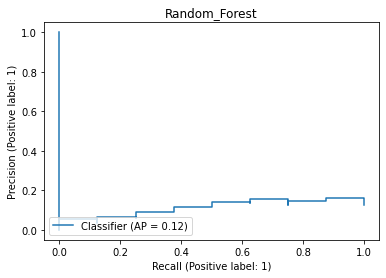

auc: 0.102 using params {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 2}:


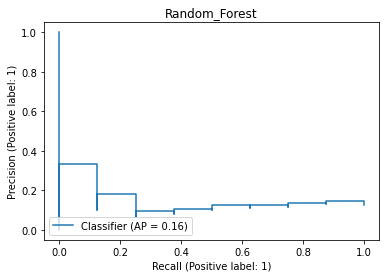

auc: 0.122 using params {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt', 'max_leaf_nodes': 5}:


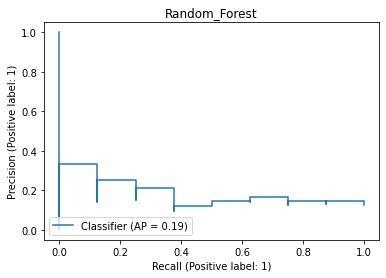

auc: 0.153 using params {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt', 'max_leaf_nodes': 50}:


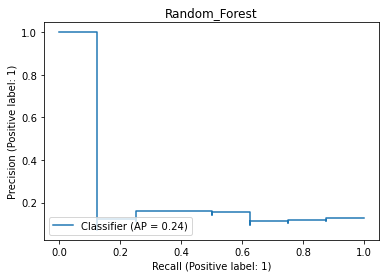

auc: 0.232 using params {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None}:


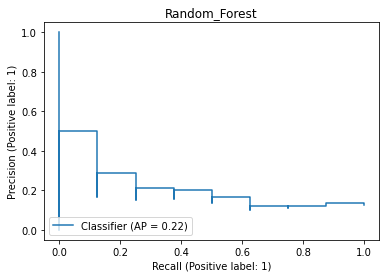

auc: 0.169 using params {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': 2}:


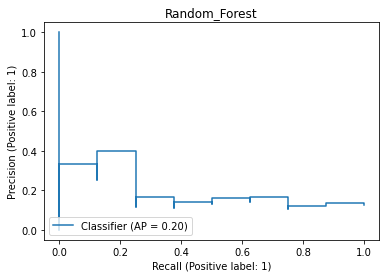

auc: 0.163 using params {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 2}:


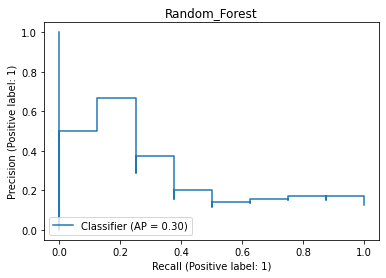

auc: 0.243 using params {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': 50}:


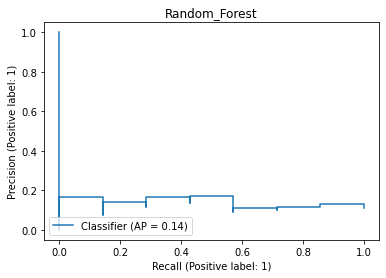

auc: 0.118 using params {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 50}:


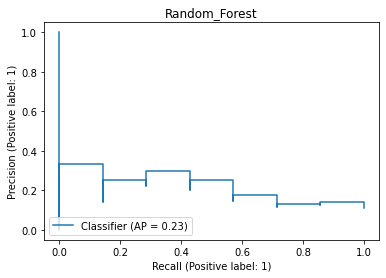

auc: 0.181 using params {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 2}:


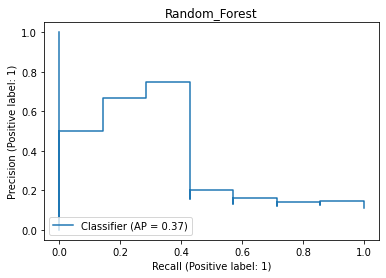

auc: 0.305 using params {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': None}:
Start training using cnv with kruskal


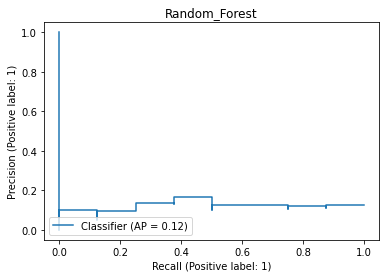

auc: 0.106 using params {'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2', 'max_leaf_nodes': 50}:


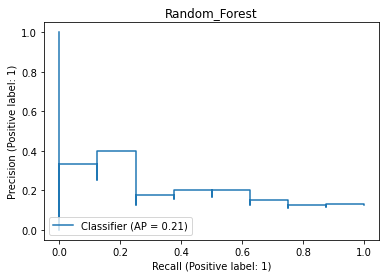

auc: 0.173 using params {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 10}:


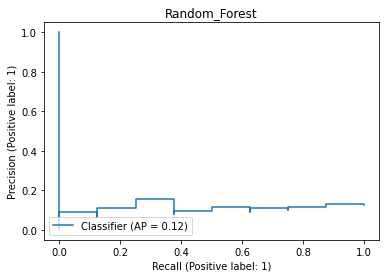

auc: 0.099 using params {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 10}:


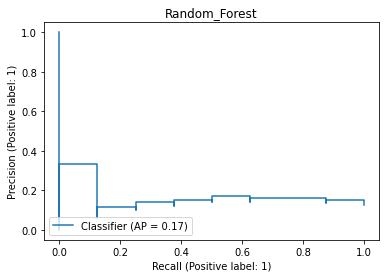

auc: 0.140 using params {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': 2}:


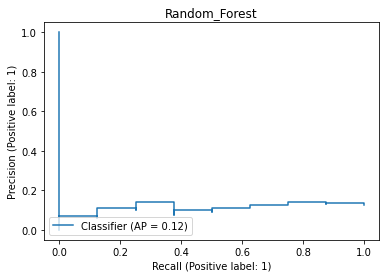

auc: 0.102 using params {'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2', 'max_leaf_nodes': 2}:


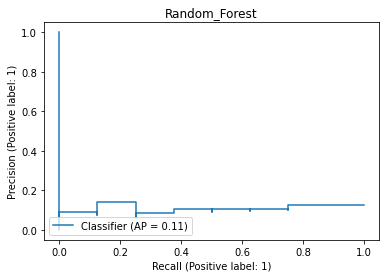

auc: 0.094 using params {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 100}:


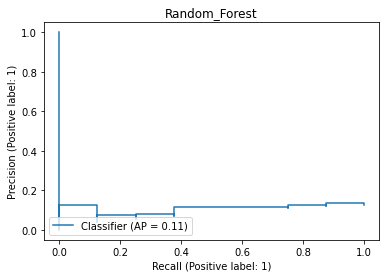

auc: 0.089 using params {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 100}:


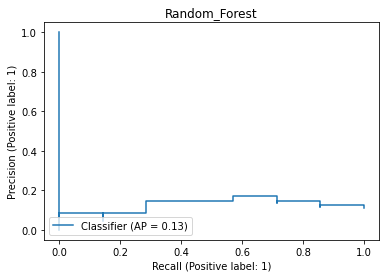

auc: 0.108 using params {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 100}:


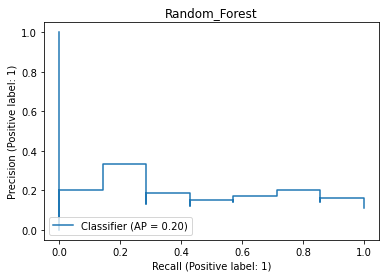

auc: 0.165 using params {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 10}:


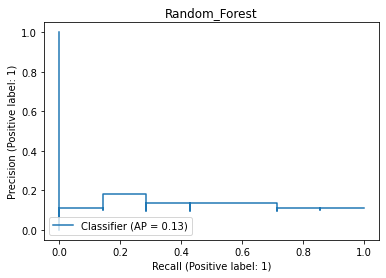

auc: 0.107 using params {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': 10}:
Start training using proteins with mannwhitneyu
Inizio a calcolare


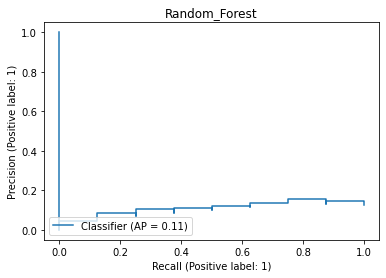

auc: 0.100 using params {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt', 'max_leaf_nodes': 10}:


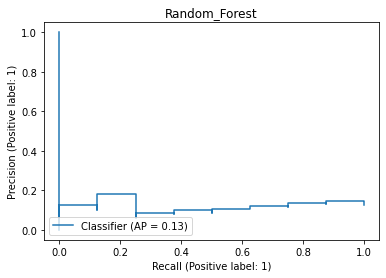

auc: 0.105 using params {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 100}:


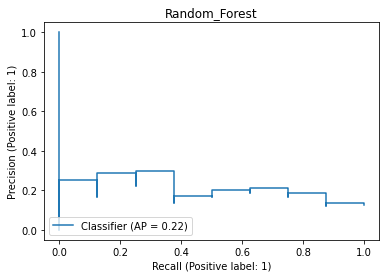

auc: 0.182 using params {'criterion': 'entropy', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': 10}:


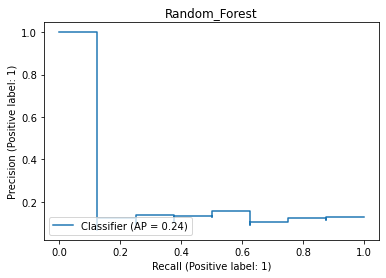

auc: 0.225 using params {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 100}:


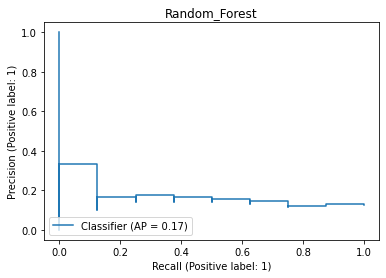

auc: 0.144 using params {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None}:


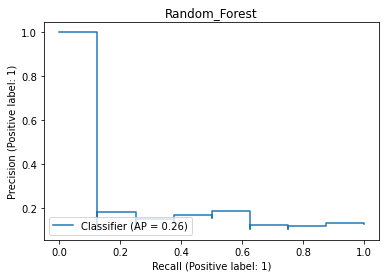

auc: 0.242 using params {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': 2}:


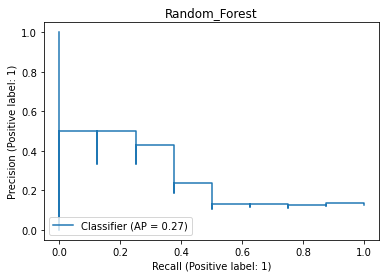

auc: 0.219 using params {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None}:


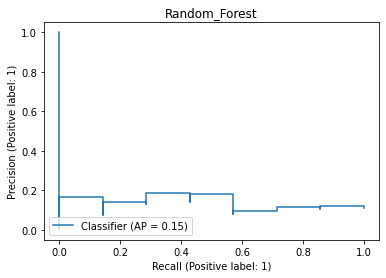

auc: 0.118 using params {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'log2', 'max_leaf_nodes': 10}:


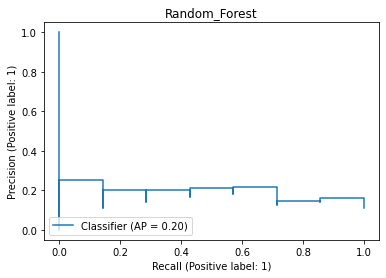

auc: 0.161 using params {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 100}:


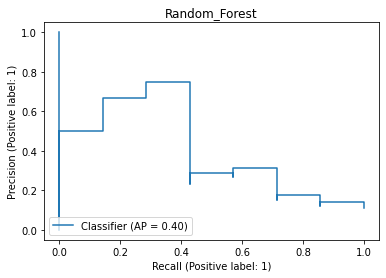

auc: 0.341 using params {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'log2', 'max_leaf_nodes': 100}:
Start training using cnv with mannwhitneyu
Inizio a calcolare


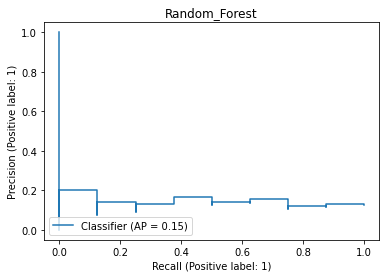

auc: 0.124 using params {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 5}:


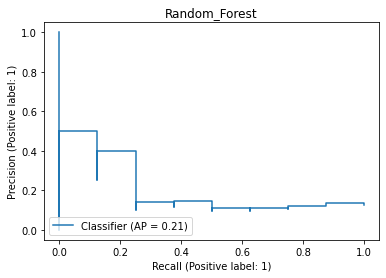

auc: 0.160 using params {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 10}:


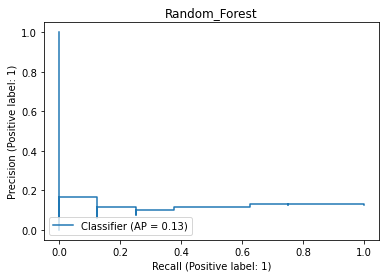

auc: 0.108 using params {'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': 2}:


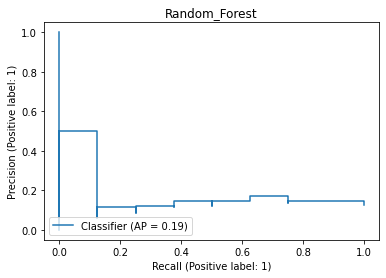

auc: 0.144 using params {'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': 5}:


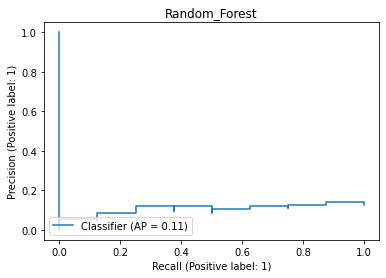

auc: 0.095 using params {'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2', 'max_leaf_nodes': 100}:


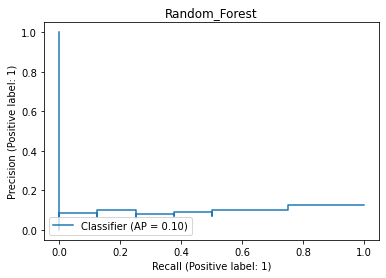

auc: 0.085 using params {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 100}:


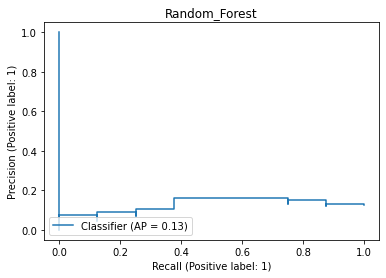

auc: 0.107 using params {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 100}:


KeyboardInterrupt: 

In [36]:
execute_all_using_json(datasets_dict_grid, names_file, dataset_list, types_feature_selection)

In [ ]:
#def create_all_json(datasets_dict, columns_name, names_file, dataset_list):
#    for (dataset_dict, name_file, dataset) in zip(datasets_dict, names_file, dataset_list):
#        print(f'Start {name_file}')
#        for type_feature_selection in columns_name:
#            print(f'Start {type_feature_selection}')
#            addResultJsonFile(dataset_dict, name_file, dataset, type_feature_selection)

In [66]:
#provare a calcolare auc concatenando le predizioni e poi calcolando la auc
#fare grafici usando le medie delle predizioni per ogni training
#poi concatenare i vari dataset e usare mannwhtynery e boruta
#provare a usare kruskal usando R
#MIC 
#cnv Spearman o Kendal poiche' ha tutti 0 e -1 e non normalizzare
#REPORT

#NETDX